# Data Mining  Project
#### Amir Ilan 322868662, Noam Diamant 208520262, Maya Naor 315176362

Import libraries and load the data

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
# for inline plots in jupyter
%matplotlib inline 
sns.set(color_codes=True) # settings for seaborn plotting style
sns.set(rc={'figure.figsize':(5,5)}) # settings for seaborn plot sizes

df = pd.read_csv("./hotels_train.csv") # load the data from the CSV file

### 1. Show the data information, e.g., types of attributes, the attributes values etc.

Shape of the data | number of reservations

In [51]:
print("Shape: ", df.shape)
print("# reservations are: ", df.shape[0])
print("# attributes are: ", df.shape[1])

Shape:  (27213, 18)
# reservations are:  27213
# attributes are:  18


Types of the attributes

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  object 
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

-> We have floats, ints and strings

Attributes values

In [53]:
df.head(10)

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
0,INN09588,1,5,Room_Type 1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.40,11/28/2018,0
1,INN07691,0,3,Room_Type 1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018,1
2,INN32192,0,2,Room_Type 4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.30,05/06/2018,0
3,INN32218,1,2,Room_Type 1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.00,9/26/2018,1
4,INN02994,1,3,Room_Type 4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.00,10/19/2017,0
5,INN19311,0,2,Room_Type 1,half board,2,0,0,0,2,414.0,Online,0,0,0,98.30,12/20/2018,1
6,INN13835,2,4,Room_Type 4,half board,3,0,0,0,2,168.0,Online,0,0,0,123.42,5/28/2018,0
7,INN15297,2,3,Room_Type 1,NaN,2,0,0,0,1,92.0,NaN,0,0,0,78.90,3/27/2018,0
8,INN17084,0,2,Room_Type 1,full board,2,0,0,0,1,9.0,Online,0,0,0,136.80,10/21/2018,0
9,INN11644,0,3,Room_Type 1,breakfast,2,0,0,0,1,180.0,Offline,0,0,0,110.00,6/16/2018,0


From the information above, we can identify missing values, attribute data types, and any mismatched data types.

Missing values: Present in the attributes 'board_type', 'lead_time', 'purchase_type', 'price'.
Unmatched data type: The 'room_type' attribute has an object data type, but we will remove the 'Room_type' string for convenience.    

remove the 'room_type' string from 'room_type' colmun for convenience:

In [54]:
# Use str.extract() to extract numeric values
df['room_type'] = df['room_type'].str.extract('(\d+\.?\d*)', expand = True).astype(int)

# Verify the data type after conversion
print(df["room_type"].dtype)

print(df['room_type'].info())

int32
<class 'pandas.core.series.Series'>
RangeIndex: 27213 entries, 0 to 27212
Series name: room_type
Non-Null Count  Dtype
--------------  -----
27213 non-null  int32
dtypes: int32(1)
memory usage: 106.4 KB
None


During the data analysis we noticed that in 27 places in the data there is an illogical date. We changed the nonsensical date everywhere it appeared to the date closest to it. and that how we handled the inconsitences
Split 'date' column to day, month, year:

In [55]:
df.loc[df['date'] == '2018-2-29', 'date'] = '03/01/2018'
# Split the "date" column into separate columns
# df[["month", "day", "year"]] = df["date"].str.split("/", expand=True)
# df["month"] = df["month"].str.extract('(\d+\.?\d*)', expand = True).astype(int)
# df["day"] = df["day"].str.extract('(\d+\.?\d*)', expand = True).astype(int)
# df["year"] = df["year"].str.extract('(\d+\.?\d*)', expand = True).astype(int)

### 2. Show the data statistics, e.g., distribution, skewness, median and more.
Split to nominal (string) and numerical (int) attributes

In [56]:
numeric_col = df.describe().columns # to get the numeric column
col_names = ""
for col in numeric_col:
    col_names += col + ", "
col_names

'weekend_nights, week_nights, room_type, n_adults, n_less_12, n_more_12, booked_tour, n_requests, lead_time, n_p_cacellation, n_p_not_cacellation, repeated, price, is_canceled, '

In [57]:
numeric_data = df[numeric_col]
nominal_data = df.drop(numeric_col, axis=1)

Numerical data:
For numerical data we would like to know the range of values, whether there are outliers, the distribution and other statistics, so first we will draw the histograms.

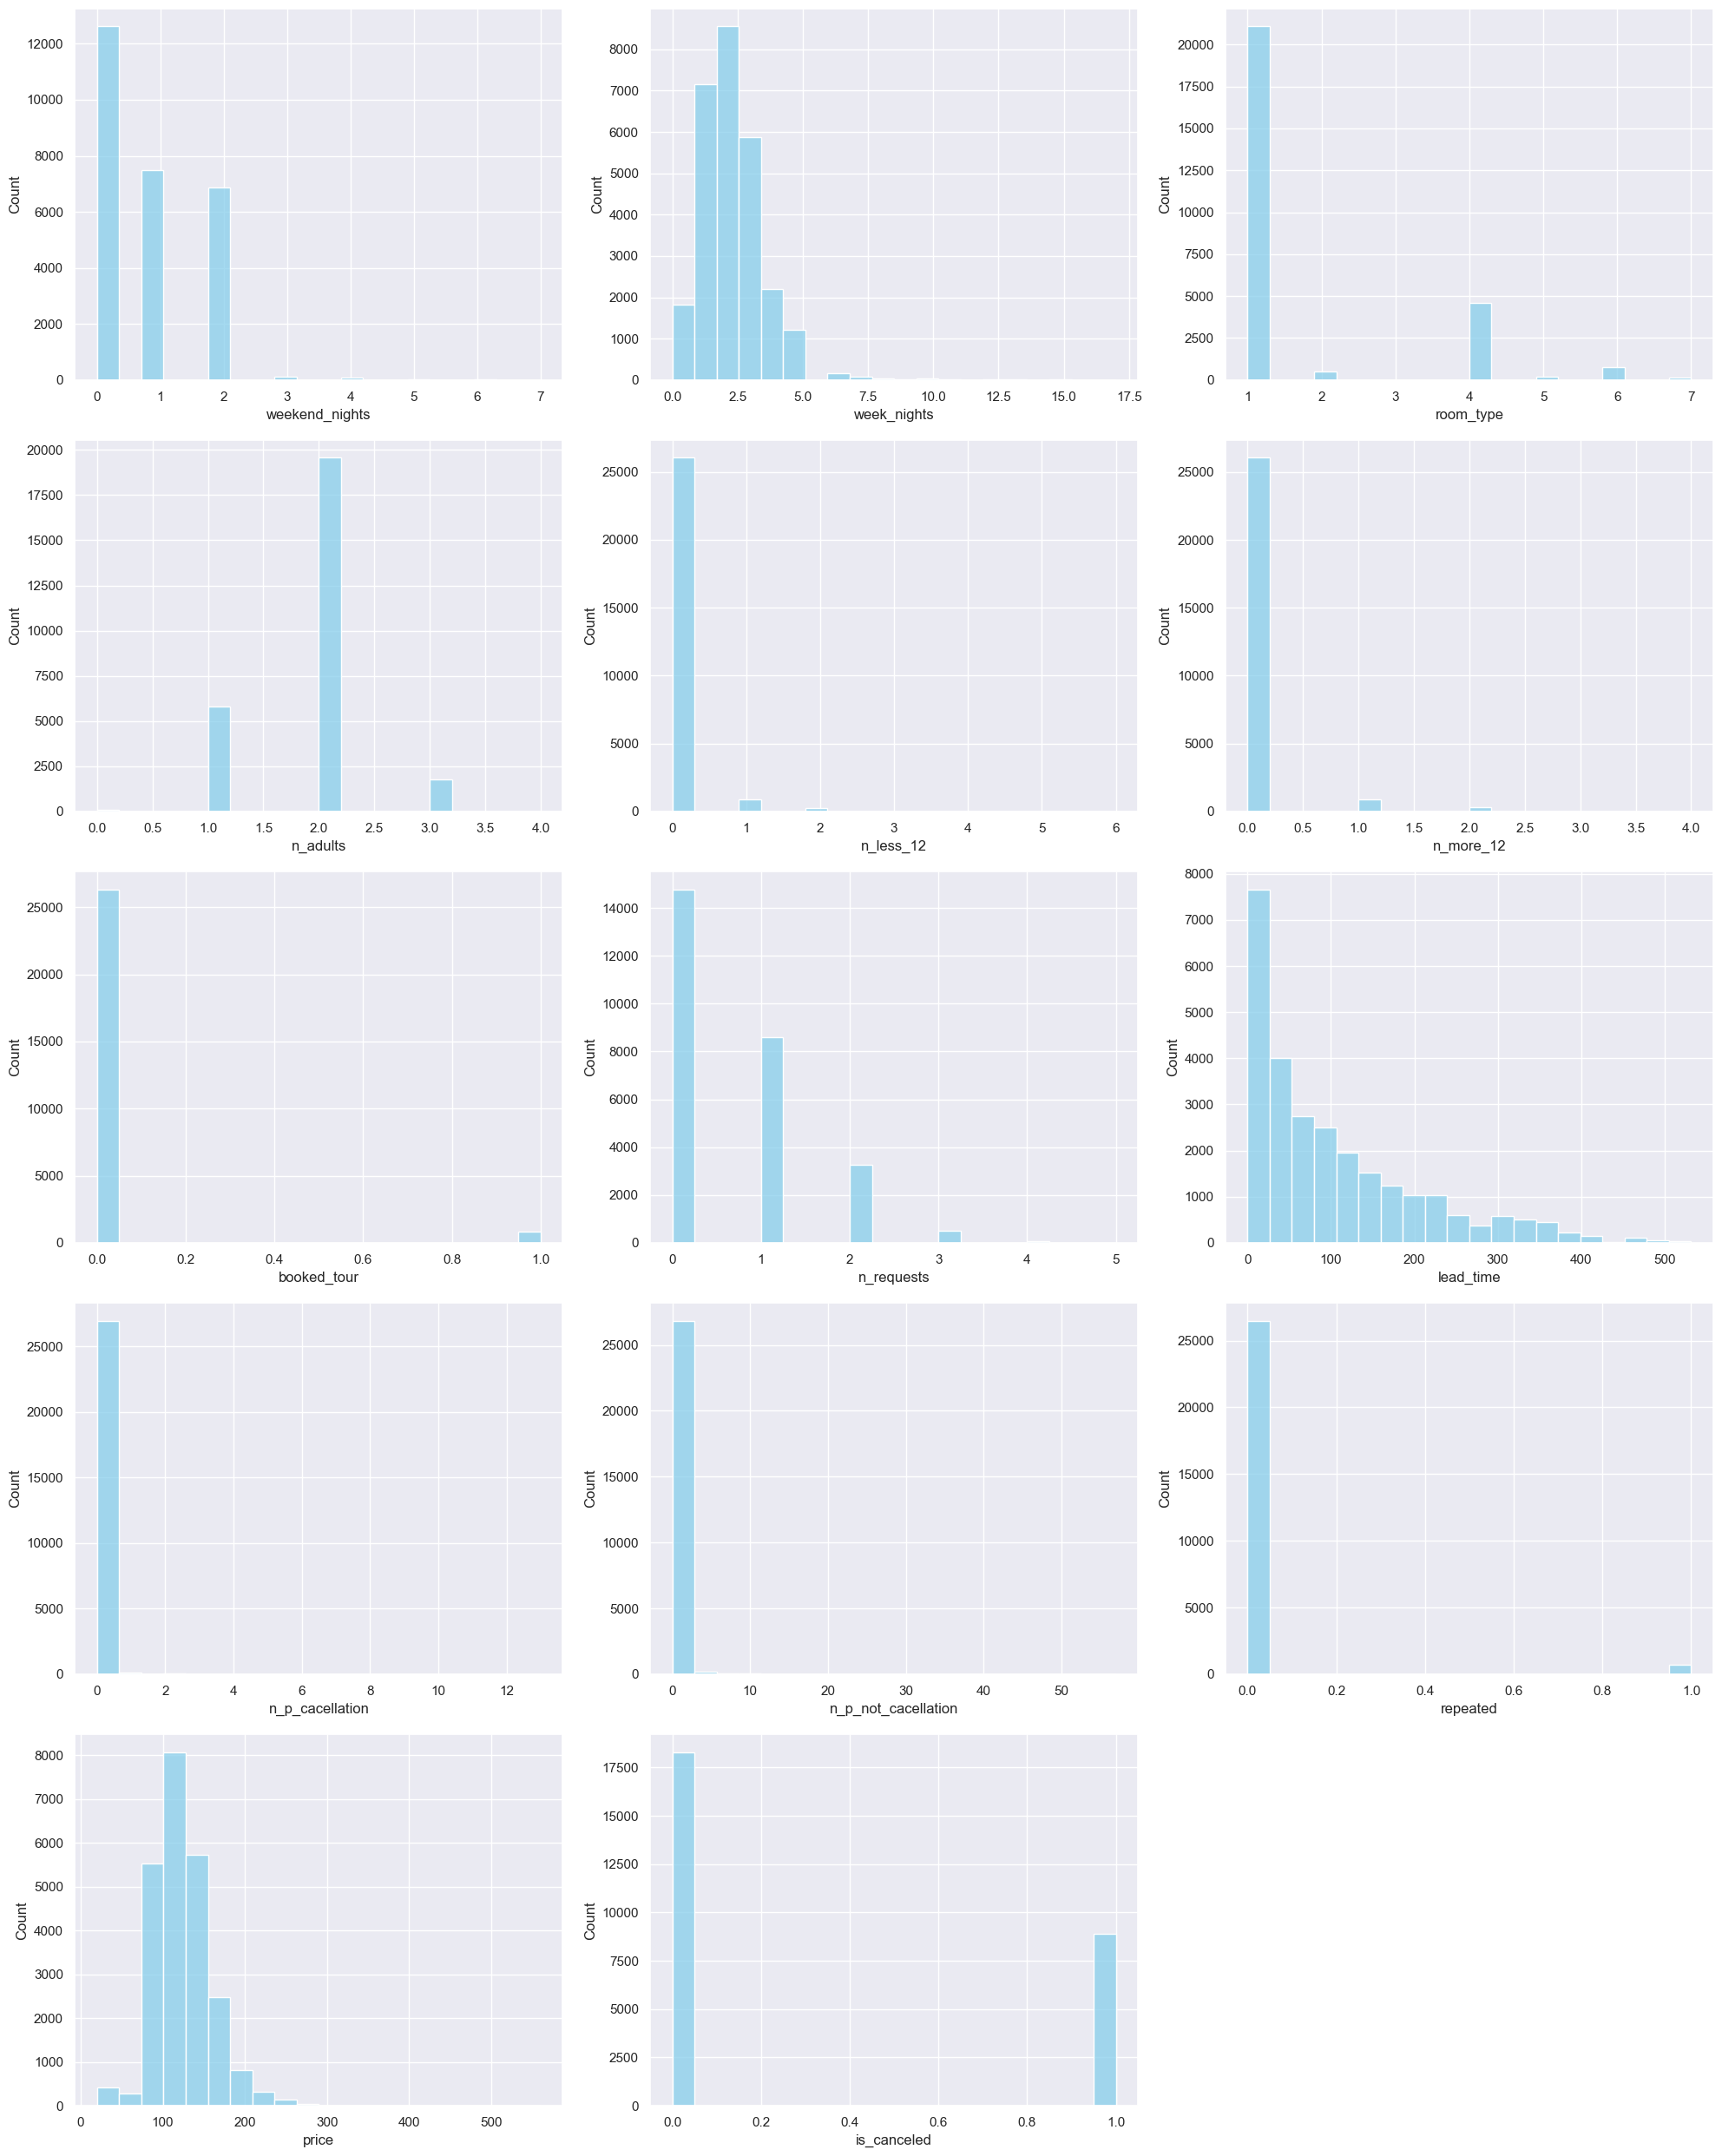

In [58]:
# Assuming numeric_col is a list of column names and numeric_data is your DataFrame

# Number of plots
num_plots = len(numeric_col)

# Calculate number of rows needed (ceil division)
num_rows = (num_plots + 2) // 3  # +2 to account for the final row with less than 3 plots

# Create a large figure
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numeric_col):
    sns.histplot(numeric_data[col], bins=20, color='skyblue', ax=axes[i])

# Remove any unused subplots in the last row
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


From the histograms above it looks like 'price', 'lead_time' and 'week_nights' is normal distributed whereas the other attributes are not. Moreover, we can see that 'weekend_nights', 'n_adults', 'n_more_12', 'n_requests', 'room_type', 'booked_tour', 'n_p_cancellation', 'n_p_not_cancellation', 'repeated', 'month', 'day', 'year' and 'n_less_12' has only few values with importance to the order i.e. it's a categorical ordinal attribute.

Show statistic information for numerical data.

In [59]:
numeric_data.describe()

,weekend_nights,week_nights,room_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,n_p_cacellation,n_p_not_cacellation,repeated,price,is_canceled
count,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,26794.000000,27213.000000,27213.000000,27213.000000,23808.000000,27213.000000
mean,0.812810,2.197332,1.712637,1.845221,0.052989,0.053357,0.031750,0.621100,102.952377,0.021975,0.155404,0.026421,123.455494,0.327674
std,0.869317,1.403576,1.404446,0.519715,0.266150,0.268688,0.175336,0.785642,103.498942,0.346697,1.728693,0.160387,35.136566,0.469374
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,100.300000,0.000000
50%,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,119.450000,0.000000
75%,2.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,153.000000,0.000000,0.000000,0.000000,140.000000,1.000000
max,7.000000,17.000000,7.000000,4.000000,6.000000,4.000000,1.000000,5.000000,532.000000,13.000000,57.000000,1.000000,560.000000,1.000000


#### Skewness
for the real numeric attributes

In [60]:
for col in ['price', 'week_nights', 'lead_time']:
    print(col+':')
    print('\tskewness:', numeric_data[col].skew(axis = 0, skipna = True))
    print('\tmedian:', numeric_data[col].median(axis = 0, skipna = True))
    

price:
	skewness: 0.682392611272259
	median: 119.45
week_nights:
	skewness: 1.5422954469230514
	median: 2.0
lead_time:
	skewness: 1.291447308852505
	median: 69.0


We can also look at the probability

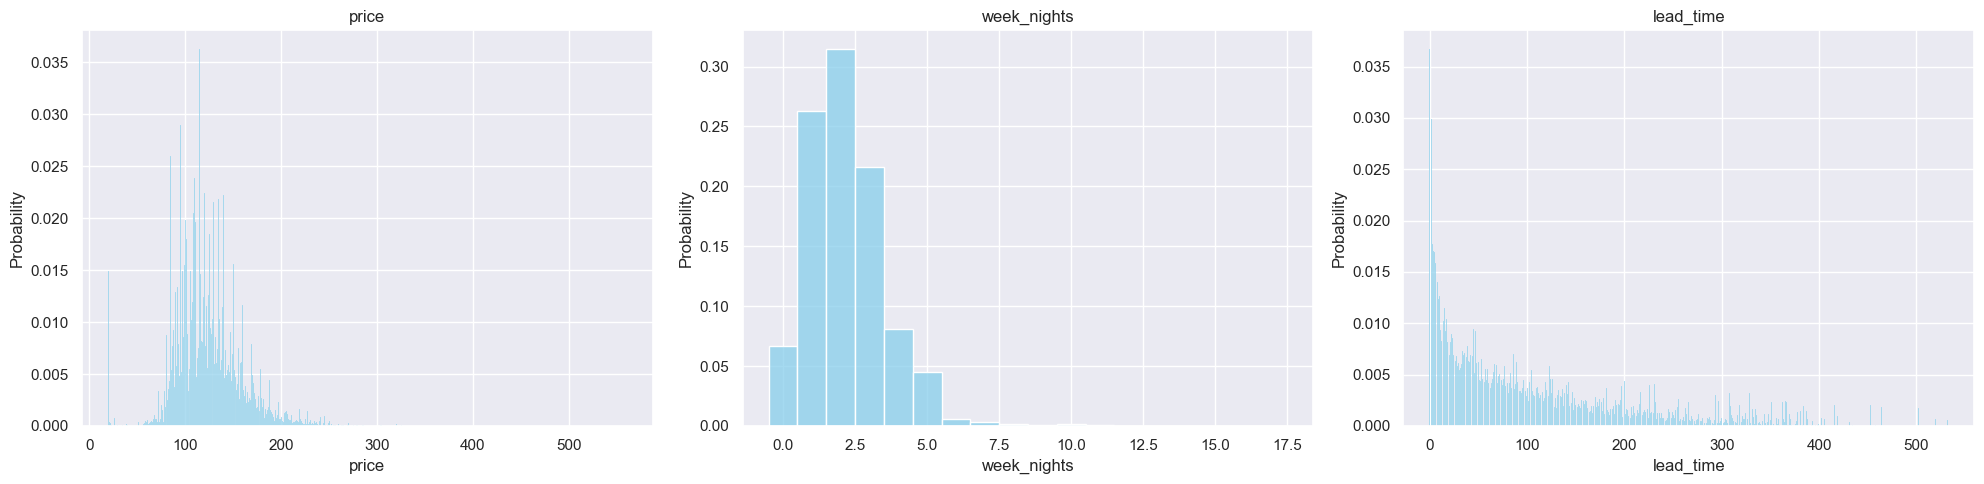

In [61]:
# Create a figure with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# List of columns to plot
columns = ['price', 'week_nights', 'lead_time']

# Iterate through the columns and plot each one in its corresponding subplot
for i, col in enumerate(columns):
    sns.histplot(numeric_data[col], color='skyblue', stat="probability", discrete=True, ax=axes[i])
    axes[i].set_title(col)  # Optional: add title for each subplot

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Nominal data:
we will show the statistics for the nominal data

In [62]:
describe_df_nominal = nominal_data.describe()
describe_df_nominal.loc['%freq'] = describe_df_nominal.apply(lambda x: np.round(x.loc['freq']/891, decimals=3))
describe_df_nominal

,ID,board_type,purchase_type,date
count,27213,19045,22366,27213
unique,27213,4,5,552
top,INN09588,half board,Online,10/13/2018
freq,1,14591,14306,188
%freq,0.001,16.376,16.056,0.211


Histograms

##### Insert the nominal missing values to the datadrame

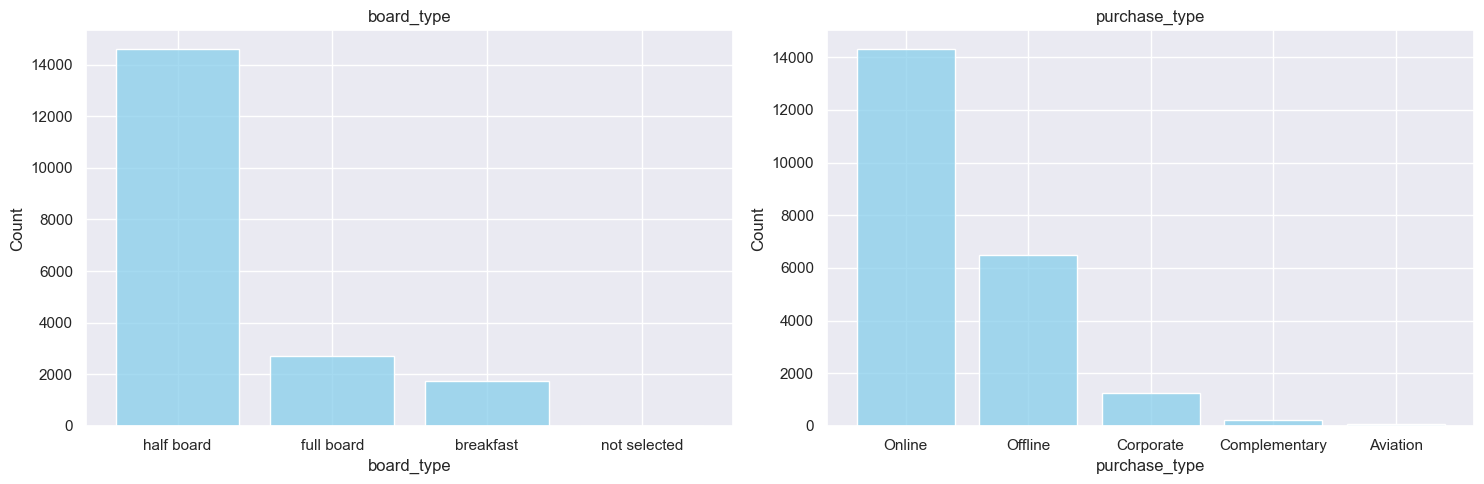

In [63]:
dist_col = ['board_type', 'purchase_type']

# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Iterate through the columns and plot each one in its corresponding subplot
for i, col in enumerate(dist_col):
    sns.histplot(nominal_data[col], shrink=0.8, color='skyblue', ax=axes[i])
    axes[i].set_title(col)  # Optional: add title for each subplot

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### 3. Show and explain attributes correlations

In [64]:
df[df.describe().columns].corr(method = 'pearson')

,weekend_nights,week_nights,room_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,n_p_cacellation,n_p_not_cacellation,repeated,price,is_canceled
weekend_nights,1.000000,0.172582,0.060986,0.106355,0.019048,0.020736,-0.033336,0.060688,0.045434,-0.023784,-0.029500,-0.072326,-0.000601,0.066571
week_nights,0.172582,1.000000,0.093326,0.105197,0.009291,0.020412,-0.052188,0.046046,0.149524,-0.027565,-0.048246,-0.100375,0.020085,0.093008
room_type,0.060986,0.093326,1.000000,0.270896,0.276393,0.278152,0.039589,0.145410,-0.106801,-0.006050,-0.009804,-0.023882,0.469287,0.026948
n_adults,0.106355,0.105197,0.270896,1.000000,-0.005528,-0.022964,0.009166,0.188380,0.096608,-0.046387,-0.124772,-0.199585,0.301024,0.087098
n_less_12,0.019048,0.009291,0.276393,-0.005528,1.000000,0.125932,0.036395,0.094793,-0.040479,-0.012620,-0.015822,-0.025912,0.257406,0.022208
n_more_12,0.020736,0.020412,0.278152,-0.022964,0.125932,1.000000,0.020203,0.099084,-0.033408,-0.012587,-0.017378,-0.029303,0.252388,0.023083
booked_tour,-0.033336,-0.052188,0.039589,0.009166,0.036395,0.020203,1.000000,0.091335,-0.062729,0.021167,0.068105,0.113914,0.057756,-0.086230
n_requests,0.060688,0.046046,0.145410,0.188380,0.094793,0.099084,0.091335,1.000000,-0.099829,0.000753,0.030748,-0.009791,0.179417,-0.250765
lead_time,0.045434,0.149524,-0.106801,0.096608,-0.040479,-0.033408,-0.062729,-0.099829,1.000000,-0.047808,-0.080618,-0.139704,-0.063702,0.436932
n_p_cacellation,-0.023784,-0.027565,-0.006050,-0.046387,-0.012620,-0.012587,0.021167,0.000753,-0.047808,1.000000,0.473422,0.384761,-0.062945,-0.036572


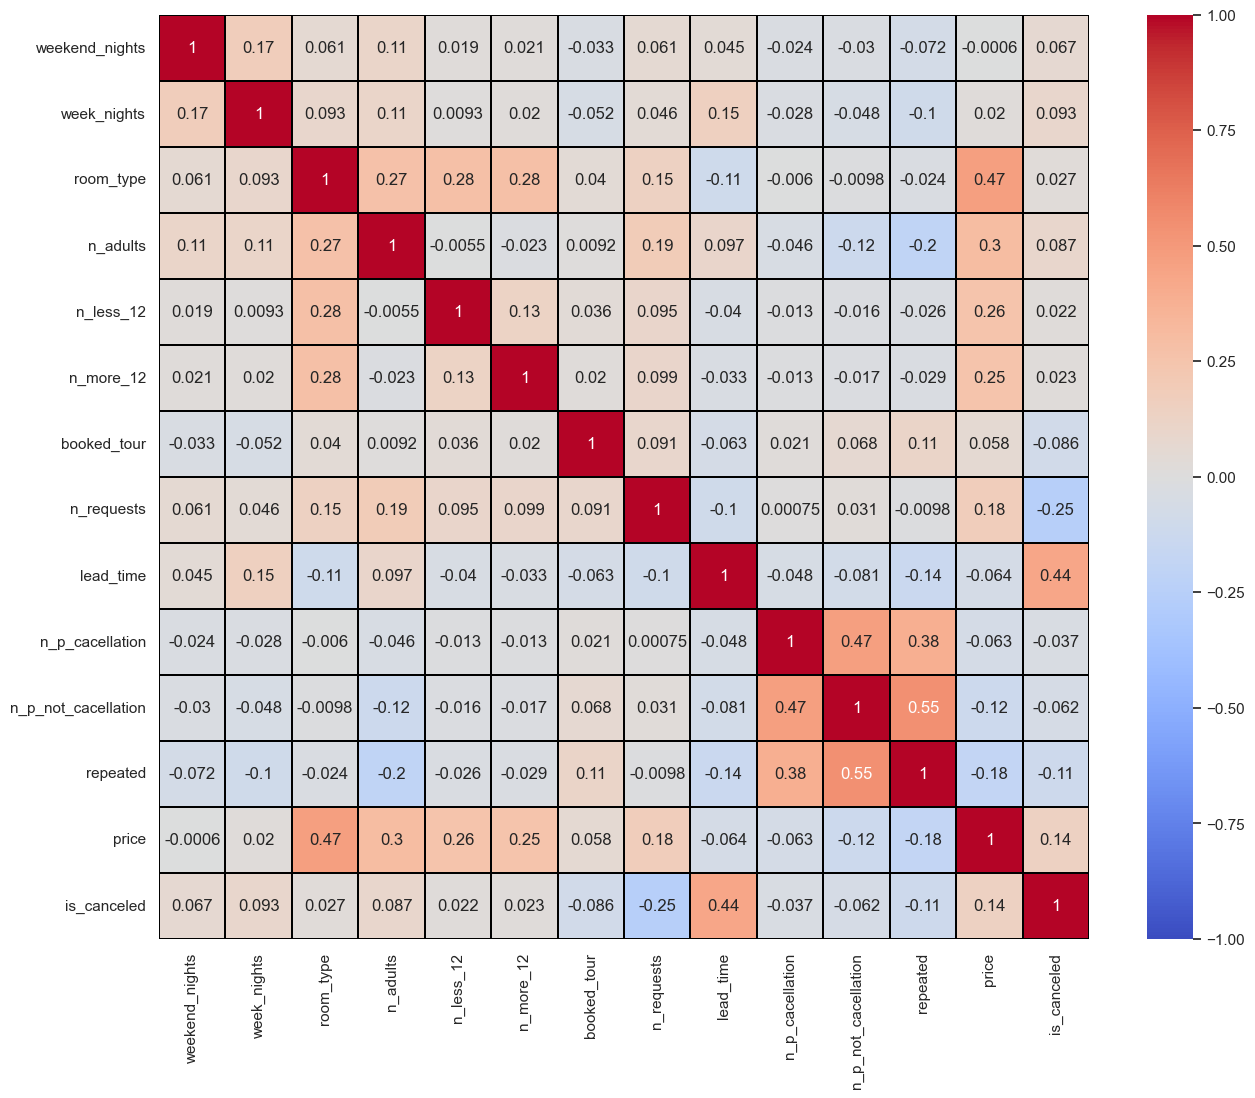

In [65]:
f, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df[df.describe().columns].corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.2, linecolor='black')

### 4. Show and explain visualizations that present interesting insights from the data.

Target

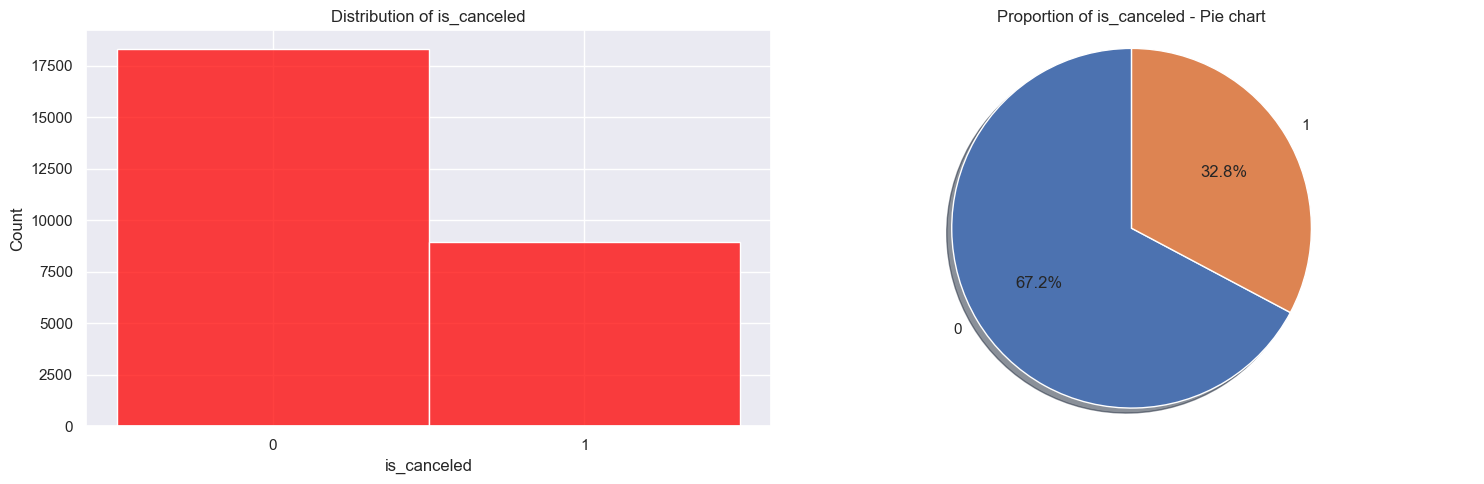

In [66]:
# Create a figure with one row and two columns
target =pd.DataFrame(df['is_canceled']) 

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the displot on the first subplot
sns.histplot(target, x='is_canceled', color='red', discrete=True, ax=axes[0])
axes[0].set_title('Distribution of is_canceled')  # Optional: add title for the first subplot
axes[0].set_xticks([0, 1])  # Set x-ticks to show only 0 and 1

# Plot the pie chart on the second subplot
axes[1].pie(target['is_canceled'].value_counts(), labels=target['is_canceled'].unique(), autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[1].set_title('Proportion of is_canceled - Pie chart')  # Optional: add title for the second subplot

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Exploring the behavior of the attributes according to the target values

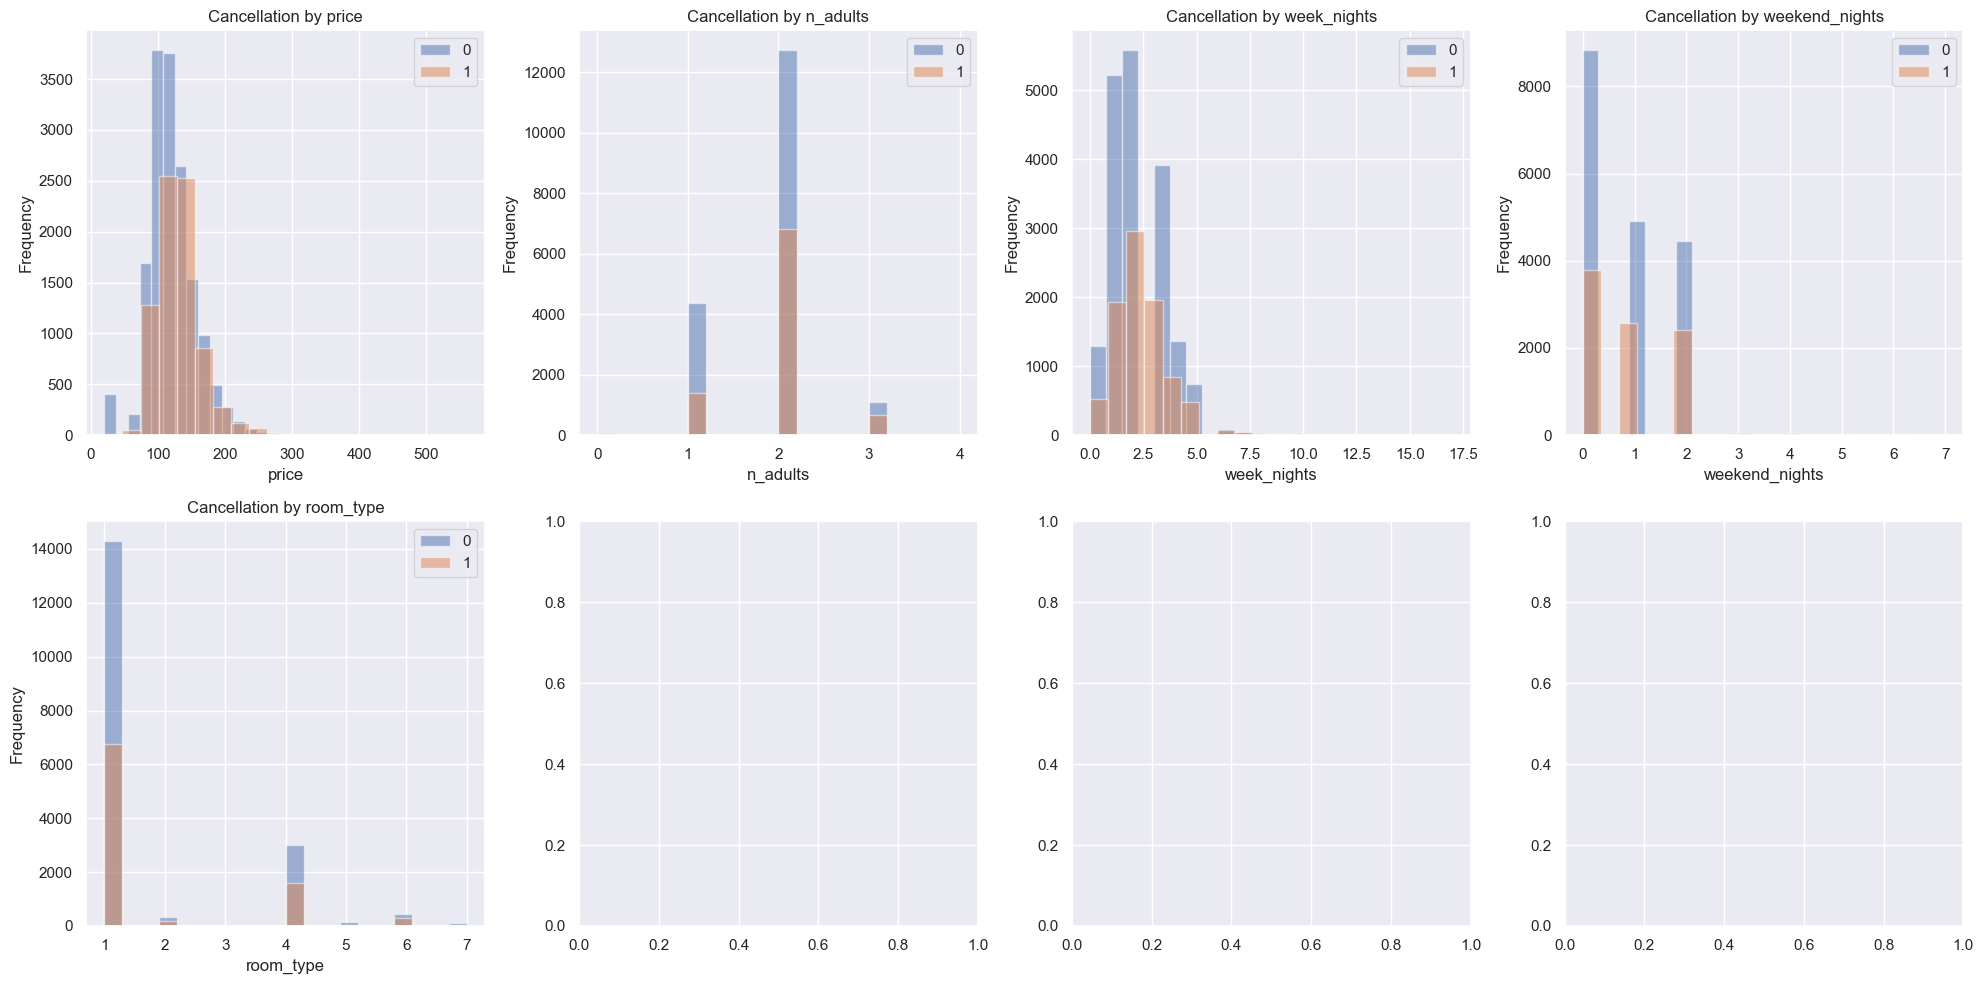

In [67]:
columns = ['price', 'n_adults', 'week_nights', 'weekend_nights', 'room_type']

# Create a figure with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the columns and plot each one in its corresponding subplot
for i, col in enumerate(columns):
    df.groupby('is_canceled')[col].plot(kind='hist', bins=20, alpha=0.5, legend=True, ax=axes[i])
    axes[i].set_title(f'Cancellation by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Scatter plot

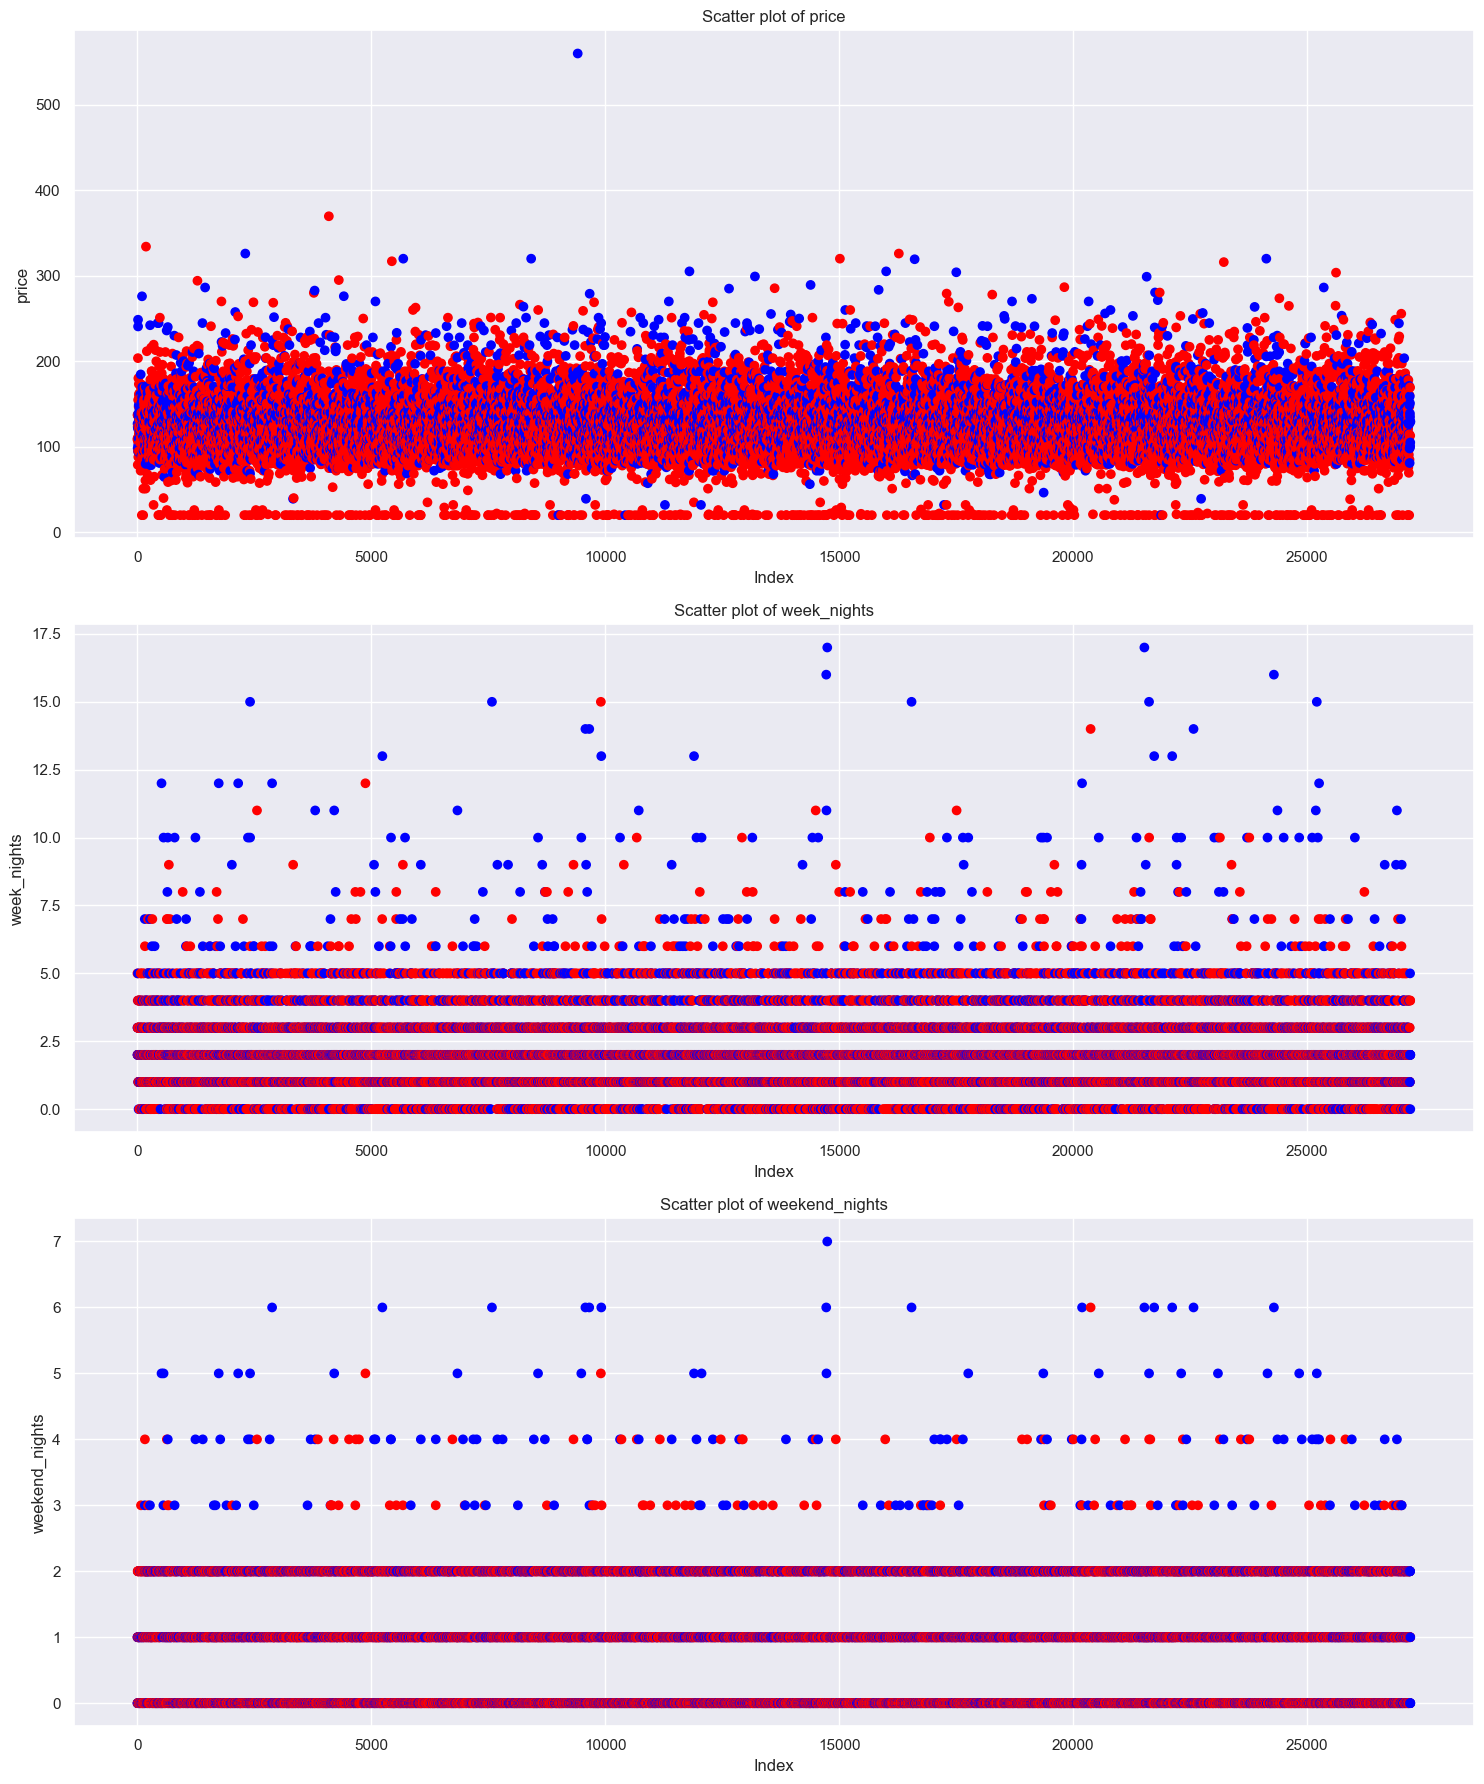

In [68]:
colordict = {0: 'red', 1: 'blue'}
columns = ['price', 'week_nights', 'weekend_nights']

# Create a large figure
plt.figure(figsize=(15, 18))

# Loop through the columns to create three subplots
for i, column in enumerate(columns, 1):
    plt.subplot(3, 1, i)
    plt.scatter(df.index, df[column], c=df['is_canceled'].map(colordict))
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.title(f'Scatter plot of {column}')

plt.tight_layout()
plt.show()

Boxplot graph 

In [69]:
# # Replace with your actual attribute names
# attribute_pairs = [("price", "room_type"), ("price", "n_adults"), ("repeated", "n_p_cacellation"),
#                     ("n_p_not_cacellation", "n_p_cacellation"), ("repeated", "n_p_not_cacellation")]

# # Create a grid of subplots for each pair
# n_pairs = len(attribute_pairs)
# fig, axes = plt.subplots(1, n_pairs, figsize=(15, 5))  # Adjust figsize as needed

# # Plot boxplots for each pair
# for i, (attr_x, attr_y) in enumerate(attribute_pairs):
#     sns.boxplot(x=attr_x, y=attr_y, hue="is_canceled", data=df, palette="Set3", ax=axes[i])
#     axes[i].set_title(f"{attr_x} vs. {attr_y}")

# # Add overall title to the entire figure
# fig.suptitle("Boxplots for Correlated Attribute Pairs")

# # Adjust spacing between subplots
# plt.tight_layout()

# # Show the plot
# plt.show()

c:\Users\amiri\anaconda3\envs\DataMiningEnviorment\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\amiri\anaconda3\envs\DataMiningEnviorment\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\amiri\anaconda3\envs\DataMiningEnviorment\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\amiri\anaconda3\envs\DataMiningEnviorment\lib\site-packag

<Axes: xlabel='n_adults', ylabel='price'>

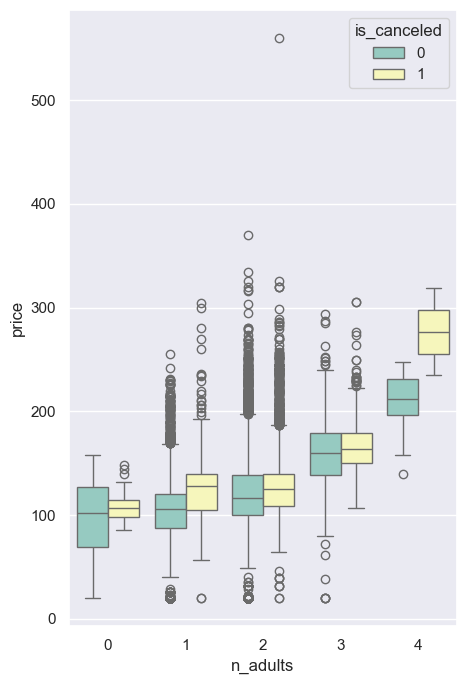

In [70]:
sns.set(rc={'figure.figsize':(5,8)})
sns.boxplot(y="price", x="n_adults", hue= "is_canceled", data=df, palette="Set3")

### 4. Data cleaning - check for each one of the problems and take care of them properly, e.g., missing values, inconsistency etc.

board_type & purchase_type: change to categorial numbering

In [71]:
df['board_type'] = df['board_type'].fillna('not selected')
df['board_type_cat'] = df['board_type'].astype('category').cat.codes
df.groupby(['board_type','board_type_cat']).size()

board_type    board_type_cat
breakfast     0                  1753
full board    1                  2697
half board    2                 14591
not selected  3                  8172
dtype: int64

In [72]:
df['purchase_type'] = df['purchase_type'].fillna('Missing')
df['purchase_type_cat'] = df['purchase_type'].astype('category').cat.codes
df.groupby(['purchase_type','purchase_type_cat']).size()

purchase_type  purchase_type_cat
Aviation       0                       77
Complementary  1                      244
Corporate      2                     1238
Missing        3                     4847
Offline        4                     6501
Online         5                    14306
dtype: int64

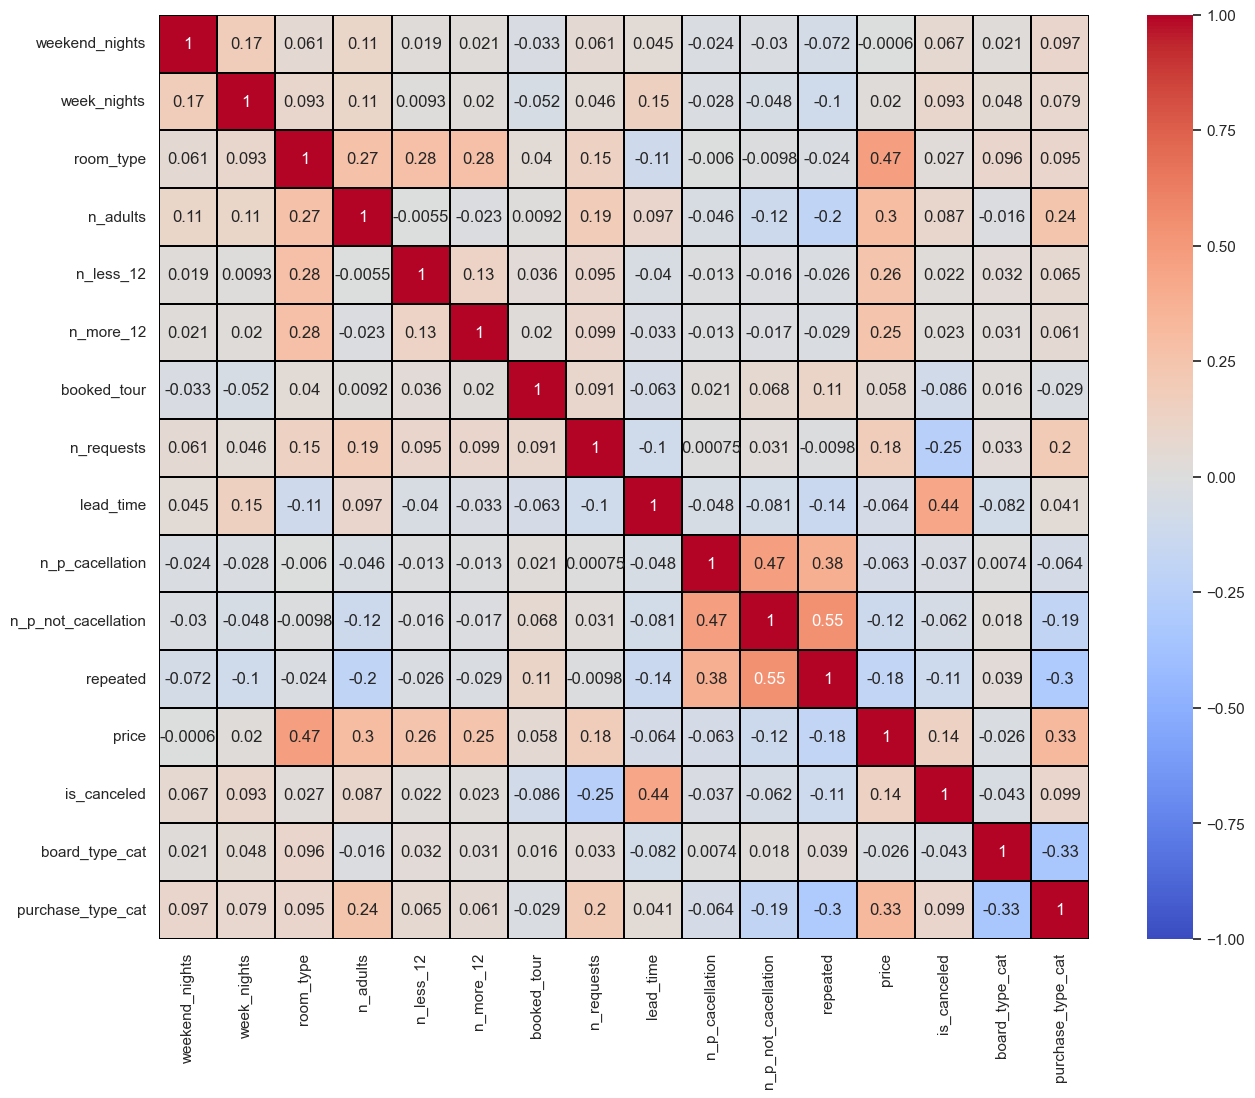

In [73]:
f, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df[df.describe().columns].corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.2, linecolor='black')

handle missing values - !!maybe we should leave it as missing!!

price & lead_time: handle missing values

lead time is a continious number so we'll fill the missing values with generated numbers from its distribtuion. We look at the histogram and it seems like a exp ditribution

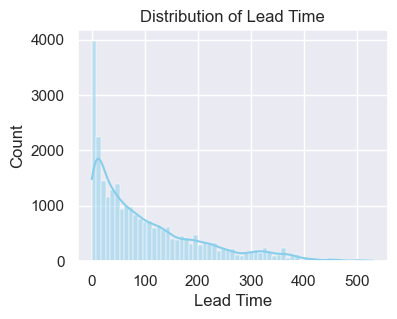

In [74]:
plt.figure(figsize=(4, 3))
sns.histplot(data=df, x='lead_time', bins='auto', kde=True, color='skyblue')
plt.xlabel('Lead Time')
plt.ylabel('Count')
plt.title('Distribution of Lead Time')
plt.show()

In [75]:
lead_time_mean = np.mean(df['lead_time'])
lead_time_lambda = 1 / lead_time_mean

df['lead_time_1'] = df['lead_time']
missing_rows = df['lead_time_1'].isna()
size = sum(missing_rows)

generated_values = np.random.exponential(scale=lead_time_lambda, size=size)
df.loc[missing_rows, 'lead_time_1'] = generated_values[:sum(missing_rows)]  # add missing values
df['lead_time_1'] = df['lead_time_1'].astype(int)   # change type to int

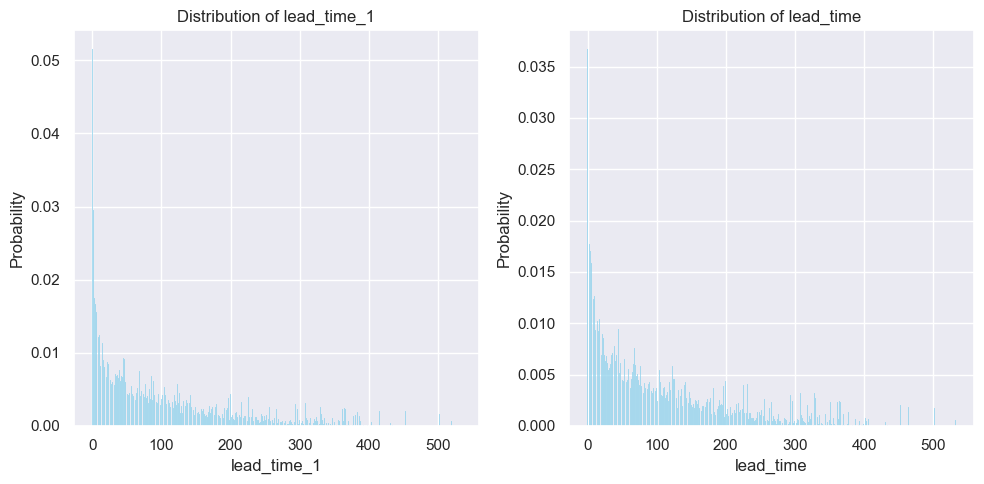

In [76]:
# Create a large figure
plt.figure(figsize=(10, 5))

# Plot for 'lead_time_1'
plt.subplot(1, 2, 1)
sns.histplot(df['lead_time_1'], color='skyblue', stat="probability", discrete=True)
plt.xlabel('lead_time_1')
plt.title('Distribution of lead_time_1')

# Plot for 'lead_time'
plt.subplot(1, 2, 2)
sns.histplot(df['lead_time'], color='skyblue', stat="probability", discrete=True)
plt.xlabel('lead_time')
plt.title('Distribution of lead_time')

plt.tight_layout()
plt.show()

 -> we can see that we maintained the distribution

we will do the same the the 'price' attribute in 2 different way

option 1

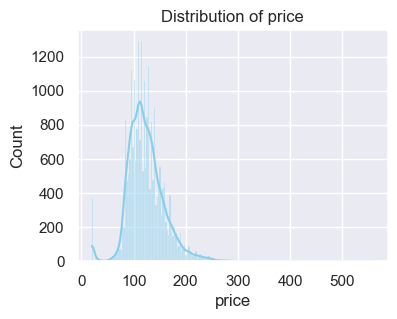

In [77]:
plt.figure(figsize=(4, 3))
sns.histplot(data=df, x='price', bins='auto', kde=True, color='skyblue')
plt.xlabel('price')
plt.ylabel('Count')
plt.title('Distribution of price')
plt.show()

In [78]:
mean_value = df['price'].mean() # mean
variance_value = df['price'].var()  # var

df['price_1'] = df['price']
missing_rows = df['price_1'].isna()
size = sum(missing_rows)    # number of missing values
generated_values = np.random.normal(loc=mean_value, scale=np.sqrt(variance_value), size=size)
df.loc[missing_rows, 'price_1'] = generated_values[:sum(missing_rows)]  # adding missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  int32  
 4   board_type           27213 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        27213 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

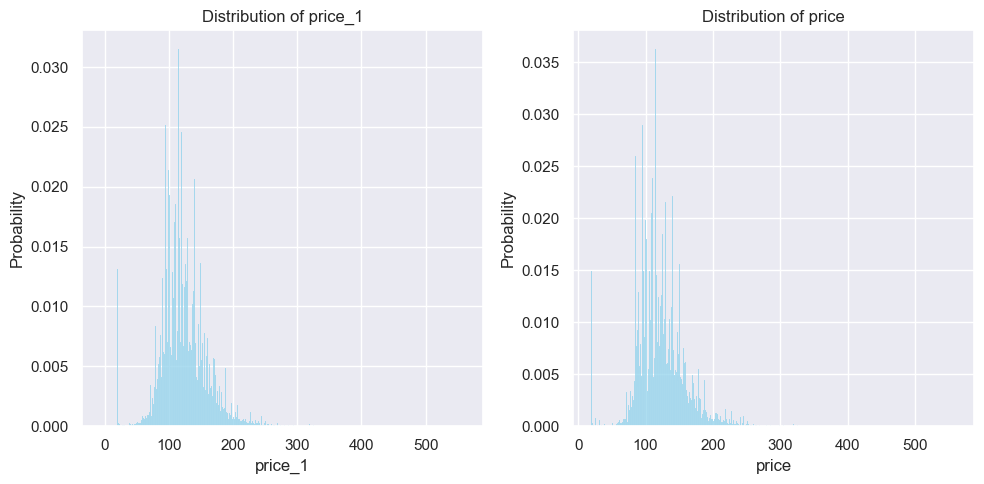

In [79]:
# Create a large figure
plt.figure(figsize=(10, 5))

# Plot for 'price_1'
plt.subplot(1, 2, 1)
sns.histplot(df['price_1'], color='skyblue', stat="probability", discrete=True)
plt.xlabel('price_1')
plt.title('Distribution of price_1')

# Plot for 'price'
plt.subplot(1, 2, 2)
sns.histplot(df['price'], color='skyblue', stat="probability", discrete=True)
plt.xlabel('price')
plt.title('Distribution of price')

plt.tight_layout()
plt.show()

 -> we can see that we maintained the distribution

option 2 - we will use the correlation (0.47) between price and room_type

<Figure size 1000x1000 with 0 Axes>

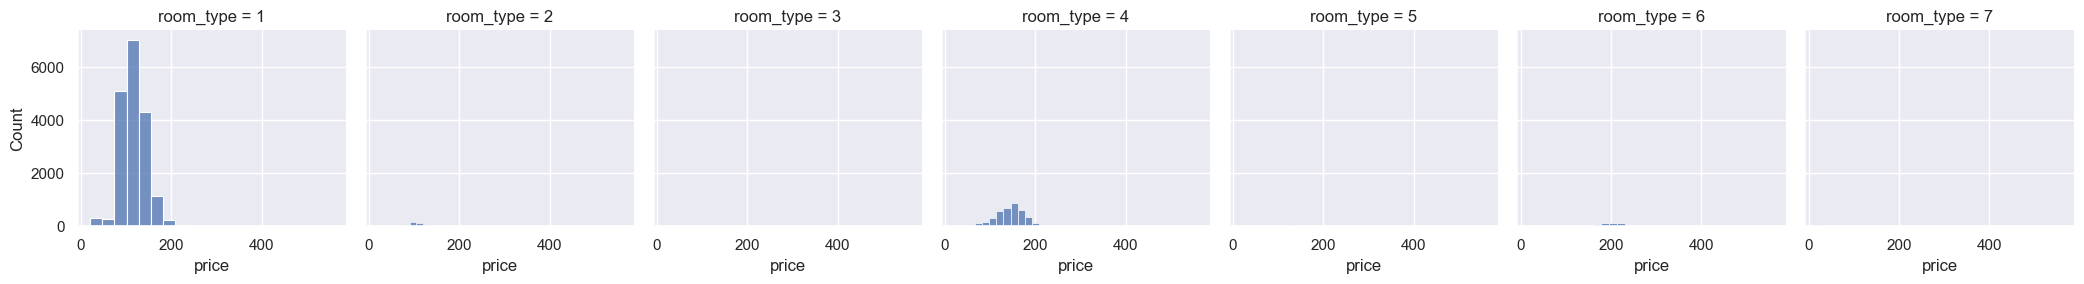

<Figure size 1000x1000 with 0 Axes>

In [80]:
g = sns.FacetGrid(df, col="room_type")
g.map_dataframe(sns.histplot, x="price", bins=20)
plt.figure(figsize=(10, 10))

In [81]:
for i in sorted(df['room_type'].unique()):
    print('For class ', i, ' the median is ', df.loc[df['room_type']==i , 'price'].median())
    print('For class ', i, ' the mean is ', df.loc[df['room_type']==i , 'price'].mean())
    print('and the number of missing price values is ', df.loc[df['room_type']==i , 'price'].isnull().sum(), 
          'out of ',(df['room_type']==i).sum(), 'rows \n' )

For class  1  the median is  114.5
For class  1  the mean is  115.88661138211383
and the number of missing price values is  2634 out of  21084 rows 

For class  2  the median is  105.85499999999999
For class  2  the mean is  108.92675438596491
and the number of missing price values is  55 out of  511 rows 

For class  3  the median is  100.75
For class  3  the mean is  111.91666666666667
and the number of missing price values is  0 out of  3 rows 

For class  4  the median is  147.65
For class  4  the mean is  145.5463647767185
and the number of missing price values is  585 out of  4571 rows 

For class  5  the median is  139.4
For class  5  the mean is  143.66717948717948
and the number of missing price values is  24 out of  180 rows 

For class  6  the median is  200.2
For class  6  the mean is  200.2548049921997
and the number of missing price values is  100 out of  741 rows 

For class  7  the median is  212.245
For class  7  the mean is  174.05896551724138
and the number of missin

In class 1 and 4 there are too many missing values hence we will handle them differently.

In [82]:
df['price_2'] = df['price']
for i in [2,3,5,6,7]:
    df.loc[df['room_type']==i , 'price_2'] = df['price_2'][df['room_type']==i].fillna(value=df['price'][df['room_type']==i].median())

In [83]:
mu_1 = df.loc[df['room_type']==1 , 'price_2'].mean()
sigma_1 = df.loc[df['room_type']==1 , 'price_2'].std()
[mu_1 , sigma_1]
mu_4 = df.loc[df['room_type']==4 , 'price_2'].mean()
sigma_4 = df.loc[df['room_type']==4 , 'price_2'].std()

In [84]:
missing_rows = (df['room_type'] == 1) & df['price'].isnull()
df.loc[missing_rows, 'price_2'] = np.random.normal(mu_1, sigma_1, sum(missing_rows))

missing_rows = (df['room_type'] == 4) & df['price'].isnull()
df.loc[missing_rows, 'price_2'] = np.random.normal(mu_4, sigma_4, sum(missing_rows))

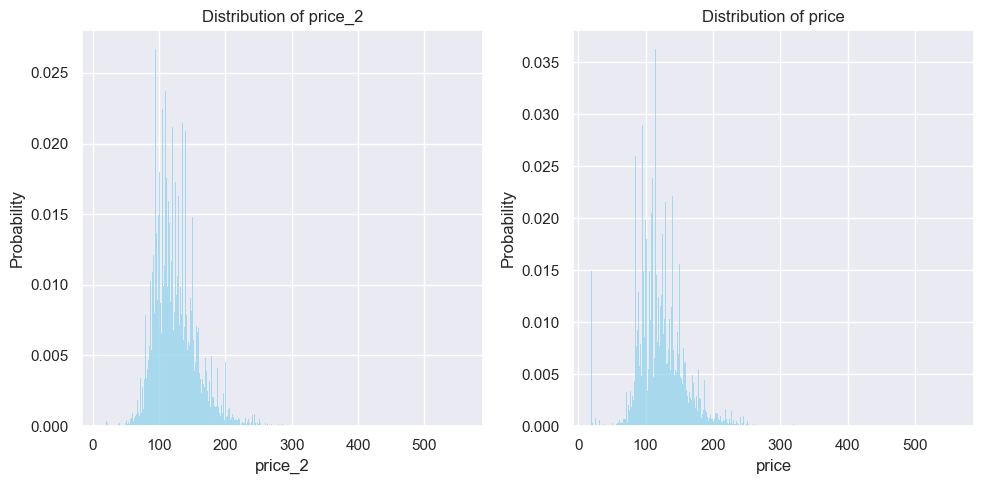

In [85]:
# Create a large figure
plt.figure(figsize=(10, 5))

# Plot for 'price_1'
plt.subplot(1, 2, 1)
sns.histplot(df['price_2'], color='skyblue', stat="probability", discrete=True)
plt.xlabel('price_2')
plt.title('Distribution of price_2')

# Plot for 'price'
plt.subplot(1, 2, 2)
sns.histplot(df['price'], color='skyblue', stat="probability", discrete=True)
plt.xlabel('price')
plt.title('Distribution of price')

plt.tight_layout()
plt.show()

 -> we can see that we maintained the distribution

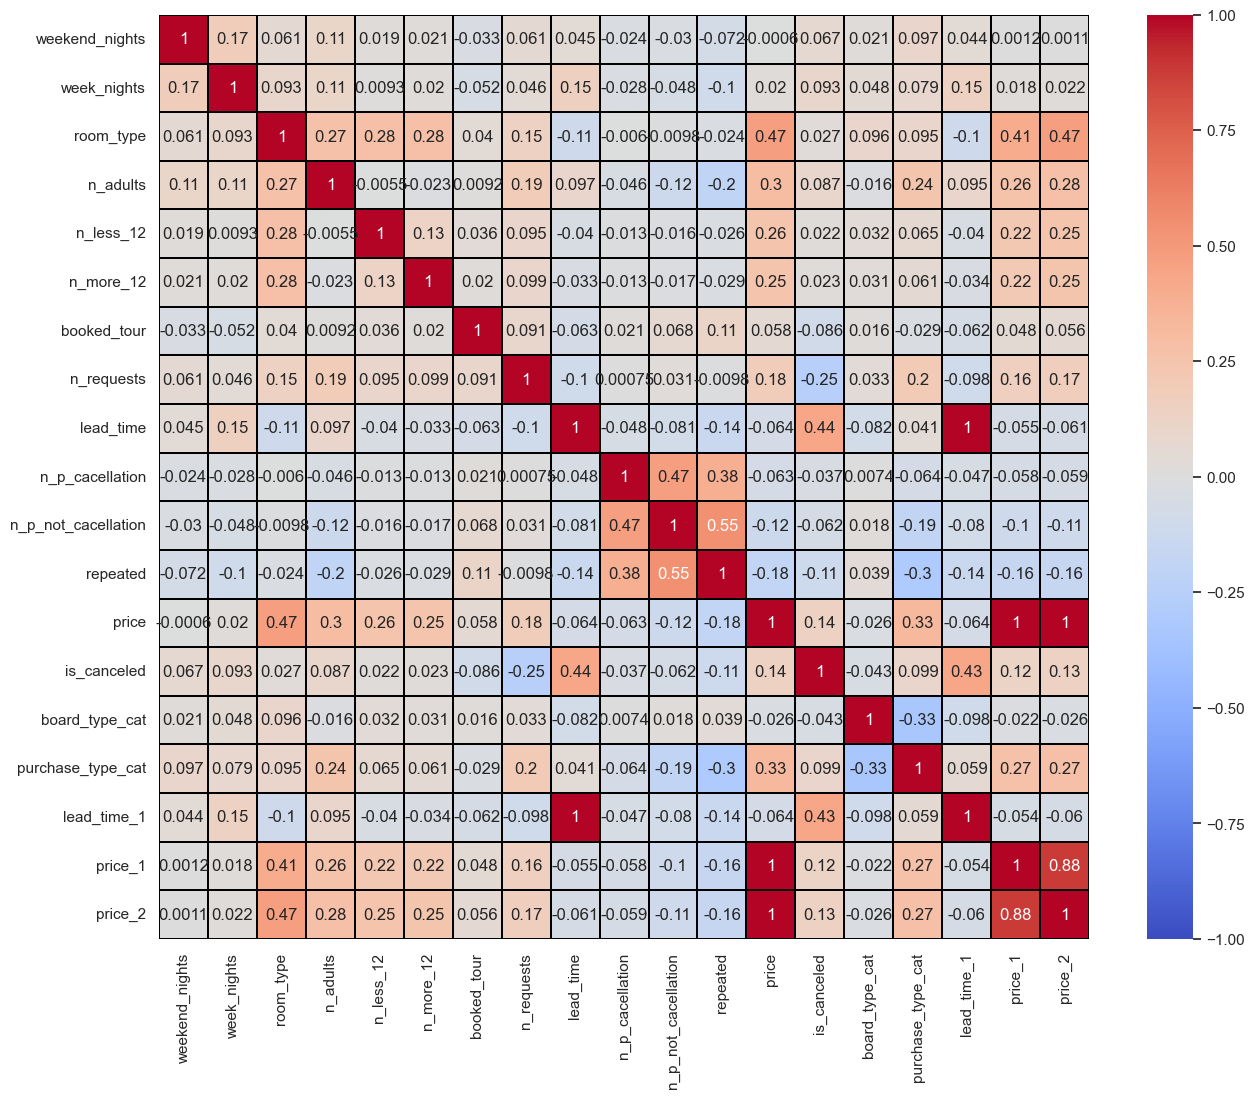

In [86]:
f, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df[df.describe().columns].corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.2, linecolor='black')

-> we can see that price_2 preserved the correlation between the features in a better way then price_1

In [87]:
df['price'] = df['price_2'].astype(int)
df['lead_time'] = df['lead_time_1']
df = df.drop(columns=['price_1', 'price_2', 'lead_time_1'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   27213 non-null  object
 1   weekend_nights       27213 non-null  int64 
 2   week_nights          27213 non-null  int64 
 3   room_type            27213 non-null  int32 
 4   board_type           27213 non-null  object
 5   n_adults             27213 non-null  int64 
 6   n_less_12            27213 non-null  int64 
 7   n_more_12            27213 non-null  int64 
 8   booked_tour          27213 non-null  int64 
 9   n_requests           27213 non-null  int64 
 10  lead_time            27213 non-null  int32 
 11  purchase_type        27213 non-null  object
 12  n_p_cacellation      27213 non-null  int64 
 13  n_p_not_cacellation  27213 non-null  int64 
 14  repeated             27213 non-null  int64 
 15  price                27213 non-null  int32 
 16  date

#### Finding Outliers

In [88]:
data_mean = df['price'].mean()
data_std = df['price'].std()
cut_off = data_std * 3
lower_bound = data_mean - cut_off
upper_bound = data_mean + cut_off
len(df.loc[(df['price'] > upper_bound) | (df['price'] < lower_bound)])

255

deleting the price outliers

In [91]:
df = df.loc[(df['price'] <= upper_bound) & (df['price'] >= lower_bound)]
df.info()                                    


<class 'pandas.core.frame.DataFrame'>
Index: 26958 entries, 0 to 27212
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   26958 non-null  object
 1   weekend_nights       26958 non-null  int64 
 2   week_nights          26958 non-null  int64 
 3   room_type            26958 non-null  int32 
 4   board_type           26958 non-null  object
 5   n_adults             26958 non-null  int64 
 6   n_less_12            26958 non-null  int64 
 7   n_more_12            26958 non-null  int64 
 8   booked_tour          26958 non-null  int64 
 9   n_requests           26958 non-null  int64 
 10  lead_time            26958 non-null  int32 
 11  purchase_type        26958 non-null  object
 12  n_p_cacellation      26958 non-null  int64 
 13  n_p_not_cacellation  26958 non-null  int64 
 14  repeated             26958 non-null  int64 
 15  price                26958 non-null  int32 
 16  date     

REVISIT - inconsistencies

trying to find more outliers

In [92]:
for column_name in df.columns:
    unique_count = df[column_name].nunique()
    print(column_name + ": " + str(unique_count))

ID: 26958
weekend_nights: 8
week_nights: 18
room_type: 7
board_type: 4
n_adults: 5
n_less_12: 5
n_more_12: 5
booked_tour: 2
n_requests: 6
lead_time: 350
purchase_type: 6
n_p_cacellation: 8
n_p_not_cacellation: 50
repeated: 2
price: 200
date: 552
is_canceled: 2
board_type_cat: 4
purchase_type_cat: 6


In [94]:
cat_col = ['weekend_nights', 'n_adults', 'n_more_12','n_less_12', 'n_requests', 'room_type', 'booked_tour', 'n_p_cacellation', 'n_p_not_cacellation', 'repeated']
for column_name in cat_col:
    value_counts = df[column_name].value_counts()
    print(f"Value counts for '{column_name}':\n{value_counts}\n")

Value counts for 'weekend_nights':
weekend_nights
0    12484
1     7436
2     6798
3      114
4       87
5       23
6       15
7        1
Name: count, dtype: int64

Value counts for 'n_adults':
n_adults
2    19370
1     5765
3     1711
0      104
4        8
Name: count, dtype: int64

Value counts for 'n_more_12':
n_more_12
0    25912
1      812
2      231
3        2
4        1
Name: count, dtype: int64

Value counts for 'n_less_12':
n_less_12
0    25881
1      849
2      225
3        2
6        1
Name: count, dtype: int64

Value counts for 'n_requests':
n_requests
0    14677
1     8520
2     3198
3      502
4       55
5        6
Name: count, dtype: int64

Value counts for 'room_type':
room_type
1    21056
4     4529
6      613
2      505
5      174
7       78
3        3
Name: count, dtype: int64

Value counts for 'booked_tour':
booked_tour
0    26116
1      842
Name: count, dtype: int64

Value counts for 'n_p_cacellation':
n_p_cacellation
0     26704
1       154
2        37
3        27

we will change the outlier features to the most frequent value of the feature

## discretezaition

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

columns = ['lead_time_1', 'price_2']
discrete_partitions = ['equal_width', 'equal_depth']

# Create subplots for each column
fig, axs = plt.subplots(len(columns), len(discrete_partitions) + 1, figsize=(12, 8))  # +1 for original distribution

for i, column_name in enumerate(columns):
    for j, partition in enumerate(discrete_partitions):
        bin_column_name = column_name + '_' + partition
        if 'width' in partition:
            df[bin_column_name] = pd.cut(df[column_name], bins=5, labels=False, include_lowest=True, right=False)
            df_counts = df[bin_column_name].value_counts().sort_index()
        elif 'depth' in partition:
            df[bin_column_name] = pd.qcut(df[column_name], q=5, labels=False, duplicates='drop')
            df_counts = df[bin_column_name].value_counts().sort_index()

        sns.histplot(data=df, x=bin_column_name, color='skyblue', stat="probability", discrete=True, ax=axs[i, j])
        axs[i, j].set_title(f"{column_name} - {partition}")
        axs[i, j].set_xlabel(bin_column_name)
        axs[i, j].set_ylabel('Probability')

    # Plot original distribution in the last column
    sns.histplot(data=df, x=column_name, color='orange', stat="probability", discrete=True, ax=axs[i, len(discrete_partitions)])
    axs[i, len(discrete_partitions)].set_title(f"{column_name} - Original Distribution")
    axs[i, len(discrete_partitions)].set_xlabel(column_name)
    axs[i, len(discrete_partitions)].set_ylabel('Probability')

plt.tight_layout()
plt.show()


Normalization

In [ ]:
columns = ['price_2', 'lead_time_1']
for column in columns:
    scaler = MinMaxScaler()
    scaler.fit(pd.DataFrame(df[column]))
    df[column+'_min_max'] = scaler.transform(pd.DataFrame(df[column]))
    print('Min - max normalization of '+column+':')
    print('\tMin value: '+str(scaler.data_min_))
    print('\tMax value: '+str(scaler.data_max_))
    print('\tdf.head() of ' + column+':')
    print(df[[column,column+'_min_max']].head())
    print()


Box plot

In [ ]:
columns = ['price', 'week_nights', 'lead_time']

# Create a figure with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Iterate through the columns and plot each one in its corresponding subplot
for i, col in enumerate(columns):
    sns.boxplot(y=col, data=df, ax=axes[i])
    axes[i].set_title(col)  # Optional: add title for each subplot

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# DATA CLEANING

Check the values in 'price'

In [ ]:
print('min:', numeric_data['price'].min())
print('max:', numeric_data['price'].max())
print('values over 350:', numeric_data[numeric_data['price']>350].shape[0])
print('values under 10:', numeric_data[numeric_data['price']<30].shape[0])

Maybe there are outliers?

In [ ]:
df[df['price']>350]

Categorial attributes

In [ ]:
cat_col = ['weekend_nights', 'n_adults', 'n_more_12','n_less_12', 'n_requests', 'room_type', 'booked_tour', 'n_p_cacellation', 'n_p_not_cacellation', 'repeated']
for col in cat_col:
    print(numeric_data[col].value_counts().sort_index())
    print('-----------------------------')

In [ ]:
df['board_type'] = nominal_data['board_type']
df['purchase_type'] = nominal_data['purchase_type']
df.info()

In [ ]:
nominal_data['purchase_type'].value_counts()